In [1]:
#Test for variational quantum eigensolver (quantum hamiltonian for qaoa)
import cirq
import numpy as np
import random
from cirq.contrib.svg import SVGCircuit, circuit_to_svg

In [2]:
def hScale(x):
    return 1-(1-x)**2

def state_init(qbit):
    oplist = []
    for i in range(len(qbit)):
        if i % 2 == 0:
            oplist.append(cirq.X(qbit[i]))
    return oplist
            
def make_H0(qbit, theta):
    oplist = []
    V = 4/3
    for i in range(len(qbit)):
        if i % 2 == 0:
            oplist.append(cirq.rz(-V*theta)(qbit[i]))
    return oplist

def make_Hp(qbit, phi):
    oplist = []
    for i in range(len(qbit)):
        if i % 2 == 0 and i+1 < len(qbit):
            oplist.append(cirq.ISWAP(qbit[i],qbit[i+1])**phi)
    for i in range(len(qbit)):
        if i % 2 != 0 and i+1 < len(qbit):
            oplist.append(cirq.ISWAP(qbit[i],qbit[i+1])**phi)
    return oplist
#partial iSWAP

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


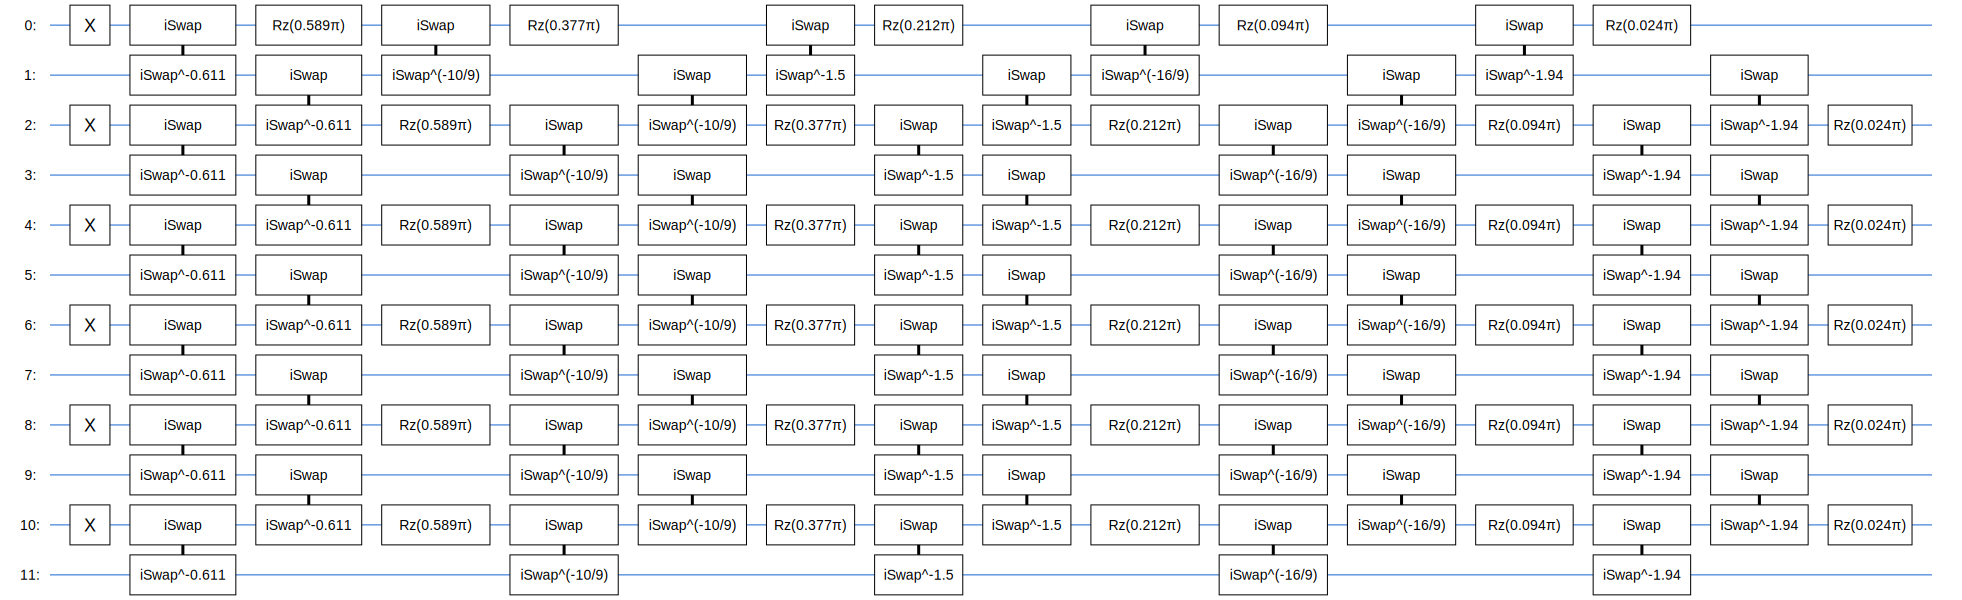

In [3]:
L = 12 #Qubit count
T = 10 #Evolution time
p = 5 #total steps

qubits = cirq.LineQubit.range(L)
operations = []


#Build the VQE
operations.append(state_init(qubits))

for k in range(p):
    scale = hScale((k+1)/(p+1)) #How each of the hamiltonians are scaled
    prob_ang = -T/p * scale #grow over time
    init_ang = -T/p * (1-scale) #shrink over time
    operations.append(make_Hp(qubits, prob_ang))
    operations.append(make_H0(qubits, init_ang))

circuit = cirq.Circuit(operations)
SVGCircuit(circuit)